$\textbf{PROGRAMMING ASSIGNMENT}$
---

Data: https://archive.ics.uci.edu.

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.

In [18]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
Y = adult.data.targets 

In [15]:
# Concatenate features and target into one dataframe
data = pd.concat([X, Y], axis=1)

# Assuming the target column name needs to be set if not already
data.rename(columns={data.columns[-1]: 'income'}, inplace=True)

# Convert income to numeric for averaging (assuming binary '0' for <=50K, '1' for >50K)
data['income_numeric'] = data['income'].apply(lambda x: 1 if x.strip().endswith('>50K') else 0)
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in plt.gca().get_yticks()])

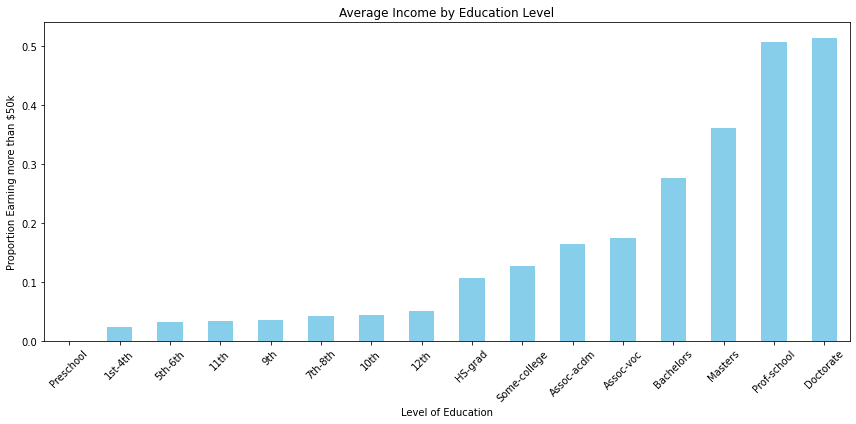

In [21]:
plt.figure(figsize=(12, 6))
education_income_avg = data.groupby('education')['income_numeric'].mean().sort_values()
education_income_avg.plot(kind='bar', color='skyblue')
plt.title('Average Income by Education Level')
plt.xlabel('Level of Education')
plt.ylabel('Proportion Earning more than $50k')
plt.xticks(rotation=45) #Way too hard to read if it's just vertical lol



plt.tight_layout()

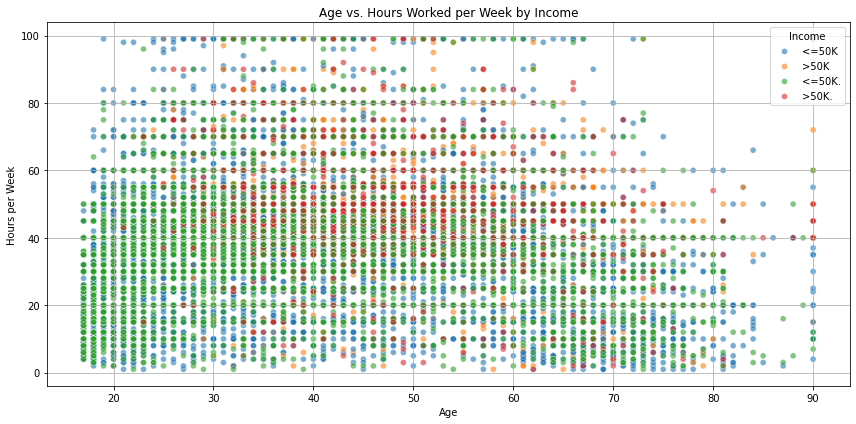

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=data, alpha=0.6)
plt.title('Age vs. Hours Worked per Week by Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.tight_layout()

plt.show()